In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Read the data file

In [70]:
catch=pd.read_csv('EGOALLO_PROTOCOL_OUTCOMES_AND_PERFORMANCES.csv')
catch.head()

rat  session_nr  performance  catch_session  catch_nr outcome
0    1           1         53.3              0       NaN     NaN
1    1           2         40.0              0       NaN     NaN
2    1           3         80.0              1       1.0       E
3    1           4         33.3              0       NaN     NaN
4    1           5         53.3              0       NaN     NaN

#### Proportion of allocentric vs. egocentric choices?

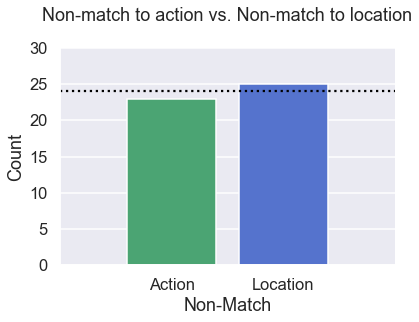

In [3]:
sns.set(context='talk')
g=sns.countplot(data=catch, x='outcome', palette=['mediumseagreen', 'royalblue'], order=['E','A'])
g.set(xlim=[-1,2], xlabel='Non-Match', xticklabels=['Action', 'Location'],
      ylim=[0,30], ylabel='Count', title="Non-match to action vs. Non-match to location\n")
plt.axhline(24, linestyle=':', color='black')
sns.despine()

In [4]:
from scipy.stats import chisquare

chisquare([23,25], f_exp=[24,24])

Power_divergenceResult(statistic=0.08333333333333333, pvalue=0.7728299926844475)

###### As expected, the chi-squared test demonstrated that the deviations to the expected frequencies (24 counts per category) are not significant. This suggests that rats do not show a preference for non-matching to location or action. 

##### What is the proportion of non matches to location in the first trial?

In [8]:
first_catch=catch[catch.catch_nr==1]

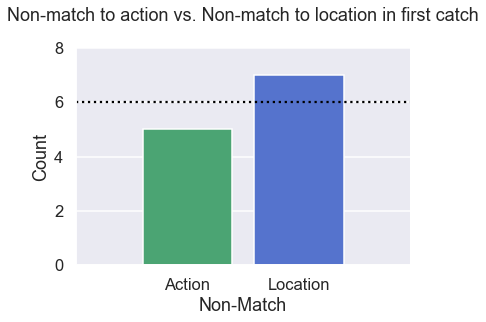

In [9]:
g=sns.countplot(data=first_catch, x='outcome', order=['E','A'],
                palette=['mediumseagreen', 'royalblue'])
g.set(xlim=[-1,2], xlabel='Non-Match', xticklabels=['Action', 'Location'],
      ylim=[0,8], ylabel='Count', title="Non-match to action vs. Non-match to location in first catch\n")
plt.axhline(6, linestyle=':', color='black')
sns.despine()

In [10]:
chisquare([5,7], f_exp=[6,6])

Power_divergenceResult(statistic=0.3333333333333333, pvalue=0.5637028616507731)

###### When looking specifically for the first catch trial, we also do not find a significant preference for one of the strategies.

#### Calculate the probability of using an allo strategy subdivided by catch trial number

In [11]:
catch_by_outcome=catch.groupby(['catch_nr'])['outcome'].value_counts().reset_index('catch_nr')
catch_by_outcome = catch_by_outcome.drop('E')

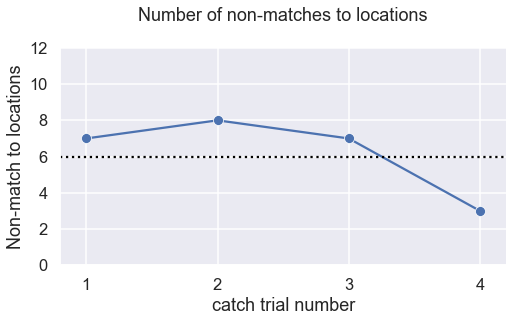

In [12]:
sns.set(context='talk')
plt.figure(figsize=(8,4))
color_scheme=['royalblue']

g=sns.lineplot(data=catch_by_outcome, x='catch_nr',y='outcome', 
            palette=color_scheme, markersize=10, marker='o')
g.set(xlim=[.8,4.2], ylim=[0,12], xlabel='catch trial number', ylabel='Non-match to locations', 
      xticks=range(1,5,1), xticklabels=range(1,5,1),
     title="Number of non-matches to locations\n")
plt.axhline(6, linestyle=':', color='black')
sns.despine()

In [13]:
chisquare([7,8,7,3], [6,6,6,6])

Power_divergenceResult(statistic=2.5, pvalue=0.4752910833430205)

###### The deviations to the expected number of non-match to locations for each catch number are not significant

#### What is the prevelence of Allocentric based choices in sequences?

In [14]:
catch['outcome']=catch['outcome'].astype('category')
outcome_counts=catch.groupby(['rat','outcome'])['catch_nr'].count().reset_index('rat').drop('E')
outcome_counts.rename(columns={'catch_nr':'counts'}, inplace=True)

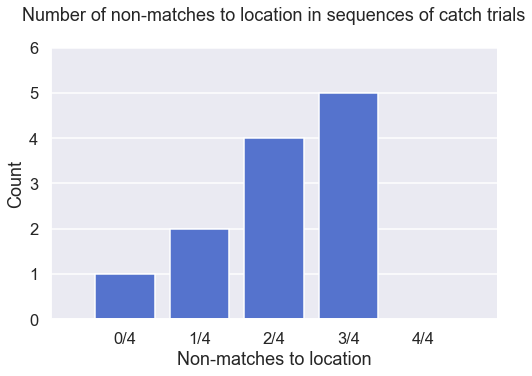

In [15]:
plt.figure(figsize=(8,5))
g=sns.countplot(data=outcome_counts, x='counts', color='royalblue')
g.set(xlim=[-1,5], xticks=range(0,5,1), 
      xticklabels=['0/4', '1/4', '2/4', '3/4', '4/4'],
     ylim=[0,6], ylabel='Count', xlabel='Non-matches to location',
     title='Number of non-matches to location in sequences of catch trials\n')
sns.despine()

##### Is session number related with the non match choice in the first catch trial?

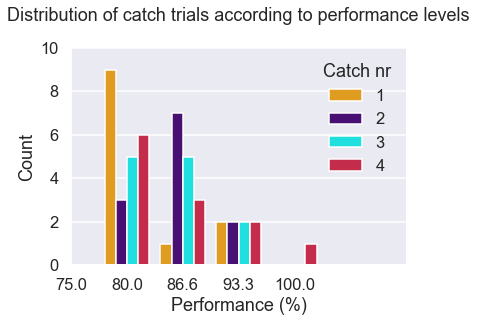

In [16]:
plt.figure(figsize=(6,4))
g=sns.countplot(data=catch, x='performance', hue='catch_nr', 
              palette=['orange', 'indigo', 'cyan', 'crimson'])
g.set(xlim=(16,22), ylim=(0,10),xlabel='Performance (%)', ylabel='Count',
     title='Distribution of catch trials according to performance levels\n')

plt.legend([1,2,3,4], title='Catch nr', frameon=False)
sns.despine()

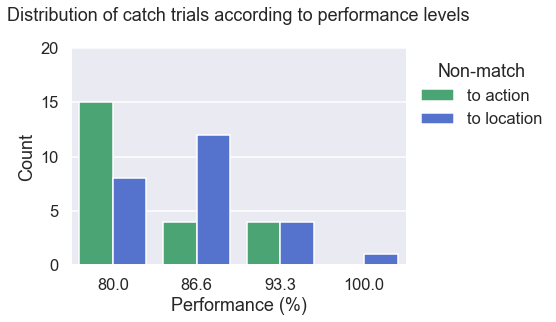

In [17]:
plt.figure(figsize=(6,4))
g=sns.countplot(data=catch, x='performance', hue='outcome', 
              palette=['mediumseagreen', 'royalblue'], hue_order=['E','A'])
g.set(xlim=(16.5,20.5), ylim=(0,20),xlabel='Performance (%)', ylabel='Count',
     title='Distribution of catch trials according to performance levels\n')

plt.legend(['to action', 'to location'], title='Non-match', frameon=False,
          bbox_to_anchor=(1,1))
sns.despine()

In [20]:
catch

rat  session_nr  performance  catch_session  catch_nr outcome
0      1           1         53.3              0       NaN     NaN
1      1           2         40.0              0       NaN     NaN
2      1           3         80.0              1       1.0       E
3      1           4         33.3              0       NaN     NaN
4      1           5         53.3              0       NaN     NaN
..   ...         ...          ...            ...       ...     ...
135   12           7         86.6              1       2.0       A
136   12           8         73.3              0       NaN     NaN
137   12           9         80.0              1       3.0       E
138   12          10         50.0              0       NaN     NaN
139   12          11         93.3              1       4.0       A

[140 rows x 6 columns]

#### Distribution of catch trial outcomes across sessions

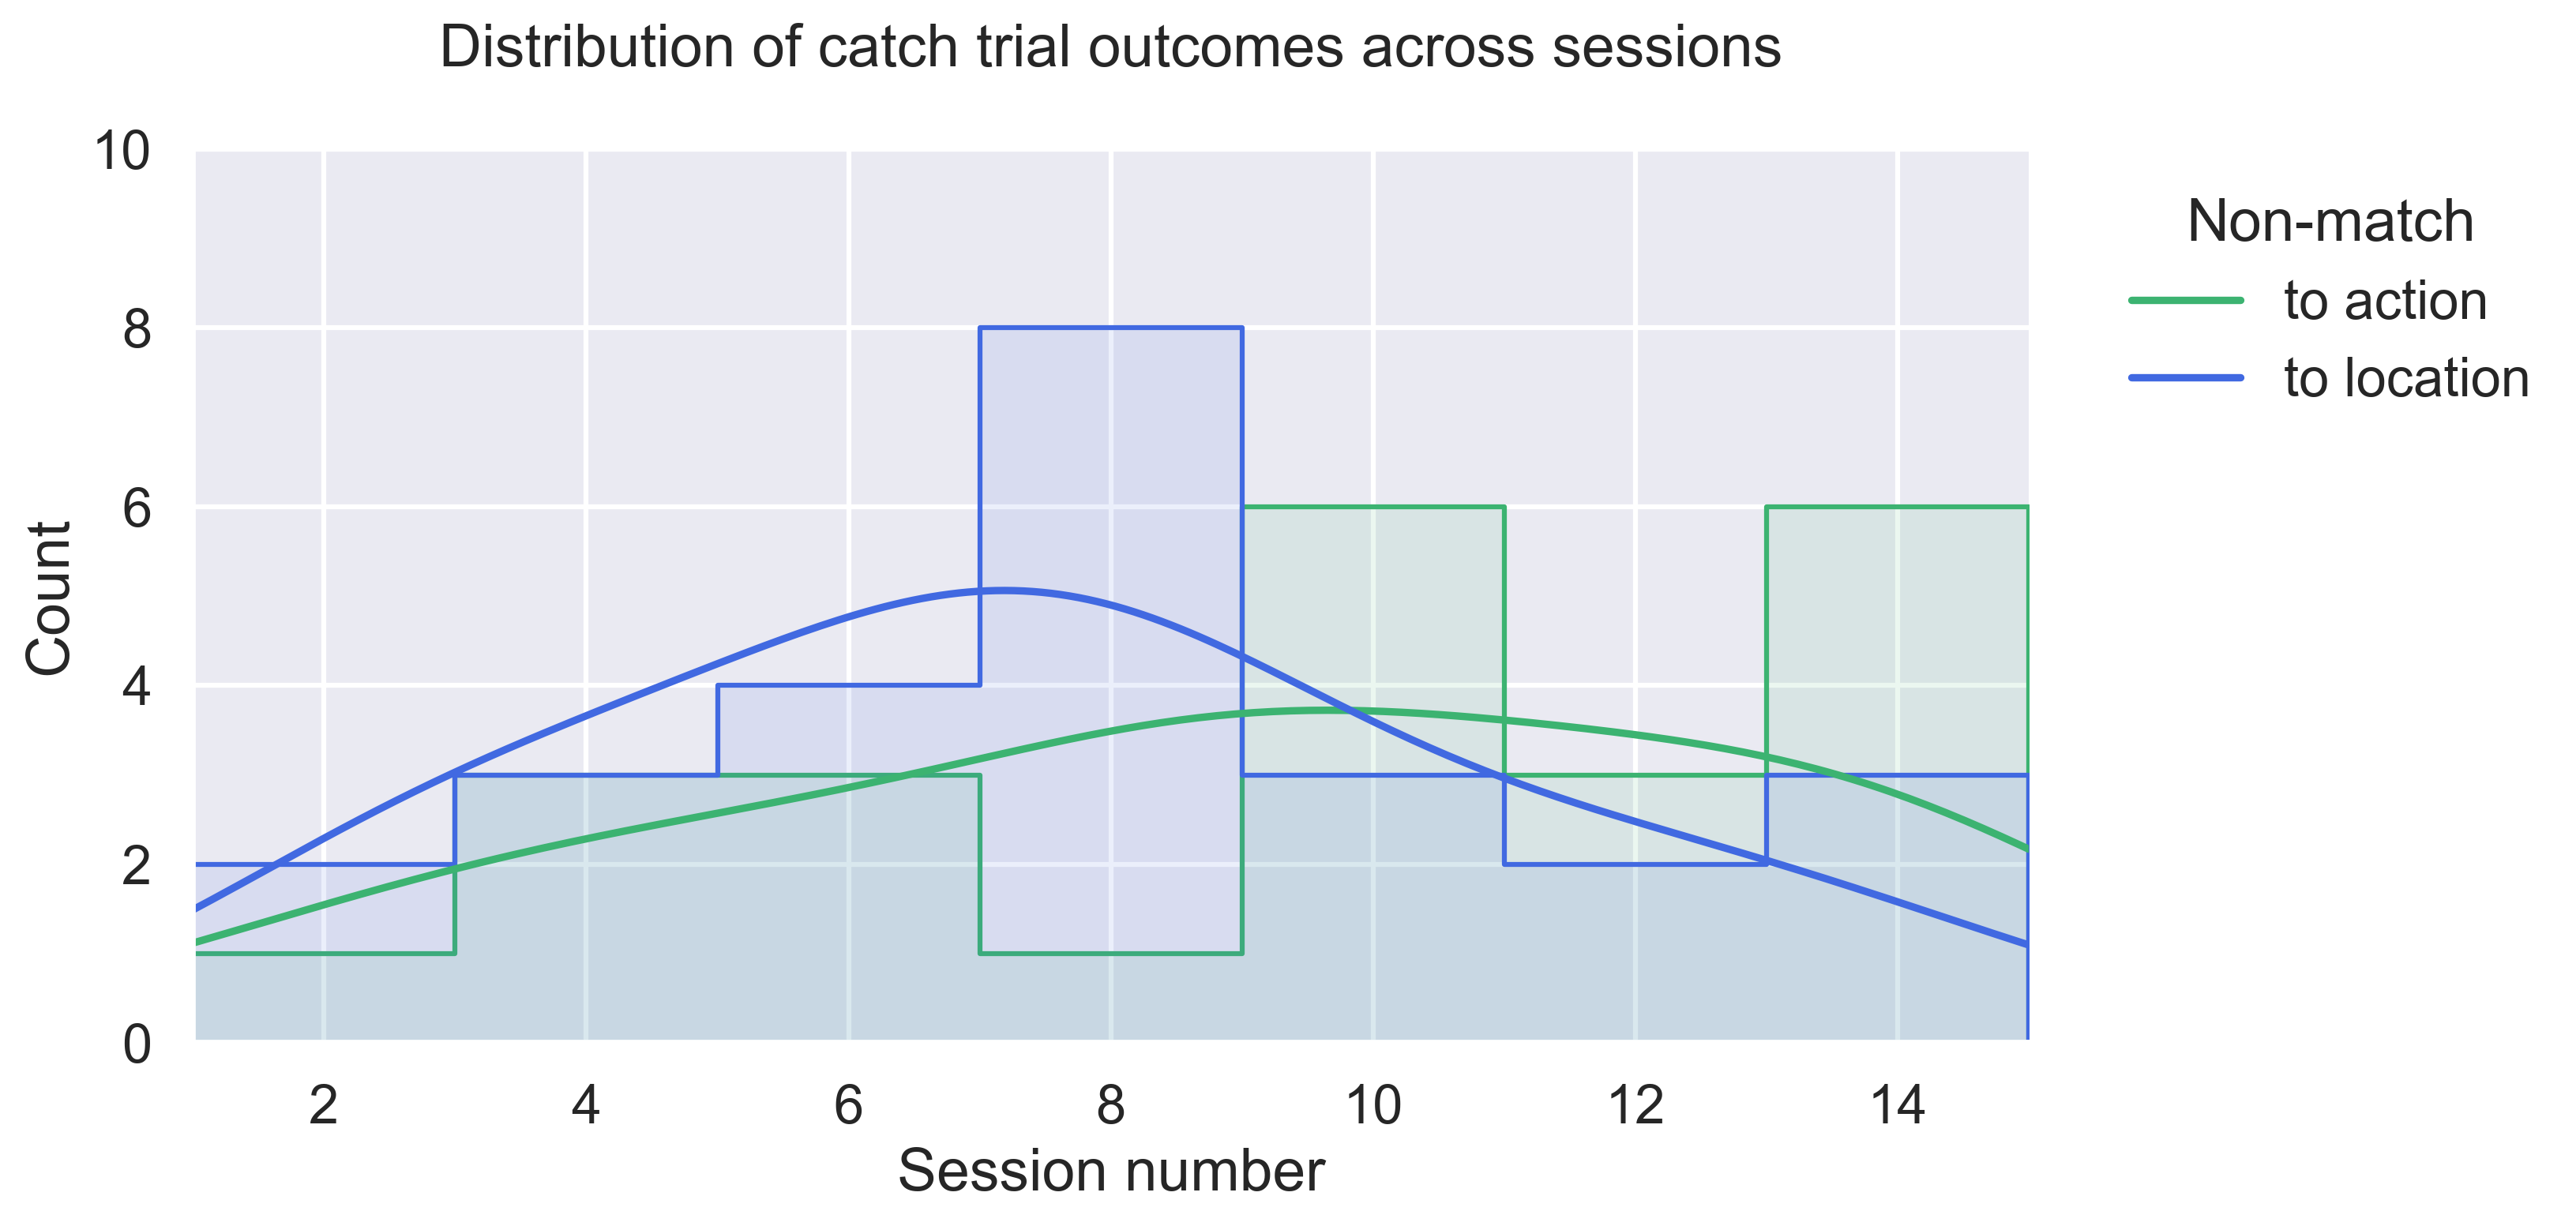

In [63]:
sns.set(context='talk')
plt.figure(figsize=(10,5), dpi=300)
g=sns.histplot(data=catch, x='session_nr', hue='outcome', kde=True, element='step',
               alpha=.1,palette=['royalblue', 'mediumseagreen']) #hue_order=['E','A'])

g.set(xlim=(1,15), ylim=(0,10),xlabel='Session number', ylabel='Count',
     title='Distribution of catch trial outcomes across sessions\n')

plt.legend(['to action', 'to location'], title='Non-match', frameon=False,
          bbox_to_anchor=(1.3,1))
sns.despine()

#### Subdivision of catch trials by catch sample side

In [73]:
catch.loc[(catch.catch_nr==1)|(catch.catch_nr==3), 'sample_side']=1
catch.loc[(catch.catch_nr==2)|(catch.catch_nr==4), 'sample_side']=2

<AxesSubplot:xlabel='sample_side', ylabel='count'>

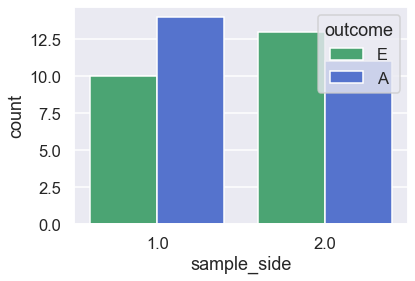

In [79]:
sns.countplot(data=catch, x='sample_side', hue='outcome', palette=['mediumseagreen', 'royalblue'])